<h1> Pesquisa em bancos de dados para astronomia</h1>

Primeiramente e necessario que o usuario tenha instalado no seu computador os modulos: numpy, pandas, astroquery, astropy, seaborn e matplotlib. O modulo Astrofunctions e um documento .py , criado pelo Rafael, que precisa estar alocado no mesmo diretorio que o codigo sera colocado.
Para instalacao dos modulos extras e necessario abrir o Terminal e digitar o comando pip install O_nome_do_modulo_de_interesse. O comando e o mesmo para usuarios do mac e para usuarios da distribuicao do anaconda no windows.  

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import astropy.units as u
import math
from astroquery.ned import Ned
from astroquery.simbad import Simbad
from astropy.table import Table,QTable
from astropy import coordinates

#Modulos autorais
import AstroFunctions as astro
from UnitConversion import hmstodegree, dmstodegree


Utilizando o modulo Pandas, o proximo passo e ler um arquivo csv alocado no endereco entre 
(""). Apos a leitura desse arquivo, o comando vvds[].values serve apara alocar em uma array 
os valores contidos na coluna intitulada "RA"

In [2]:
vvds = pd.read_csv("vvds-not.csv")
RA = vvds["RA"].values
DEC = vvds["DEC"].values

Para que seja possivel percorrer varias regioes relacionadas aos varios valores contidos na coluna que descreve as coordenadas e necessario realizar a pesquisa com o auxilio de um for que percorre todas as linhas das arrays e pesquisa regiao por regiao.


Com relação ao astroquery, ele possui um tempo limite de conexão com o servidor que e pequeno, por isso para uma pesquisa de muitos dados e necessário alterar o valor da variável timeout na pasta em que o modulo astroquery foi instalado e na respectiva pasta do banco de dados.

In [3]:
l1 = []
l2 = []
for i in range(len(RA)):
    co = coordinates.SkyCoord(ra = RA[i],dec= DEC[i],unit=(u.deg,u.deg))
    #Pesquisa no banco de dados NED
    ned_table = Ned.query_region(co, radius=0.0007* u.deg) #sugestao 0.0007
    df = ned_table.to_pandas()
    l1.append(df)
    #Pesquisa no banco de dados SIMBAD
    simbad_table = Simbad.query_region(co, radius=0.0007* u.deg)
    df = simbad_table.to_pandas()
    l2.append(df)


In [43]:
array = []
for i in range(5):
    co = coordinates.SkyCoord(ra = RA[i],dec= DEC[i],unit=(u.deg,u.deg))
    #Pesquisa no banco de dados NED
    tabela = Ned.query_region(co, radius=0.0007* u.deg) #sugestao 0.0007
    if len(tabela)>1:
        for j in range(len(tabela)-1):
            print(tabela)
            distancia1 = math.sqrt((math.radians(tabela['DEC'][0])-math.radians(DEC[i]))**2 + (math.radians(tabela['RA'][0])-math.radians(RA[i]))**2)
            distancia1 = math.sqrt((math.radians(tabela['DEC'][1])-math.radians(DEC[i]))**2 + (math.radians(tabela['RA'][1])-math.radians(RA[i]))**2)                      
            if distancia1 > distancia2:
                tabela.remove_row(0)
            else:
                tabela.remove_row(1)
    print(tabela)            
    df = tabela.to_pandas()
    array.append(df)

No.  Object Name       RA     ... Redshift Points Diameter Points Associations
                    degrees   ...                                             
--- -------------- ---------- ... --------------- --------------- ------------
  1 VVDS 020086348    36.6795 ...               1               0            0
  2 VVDS 020086179   36.67985 ...               0               0            0
  3 VVDS 020086136   36.68013 ...               0               0            0
No.  Object Name       RA     ... Redshift Points Diameter Points Associations
                    degrees   ...                                             
--- -------------- ---------- ... --------------- --------------- ------------
  1 VVDS 020086348    36.6795 ...               1               0            0
  3 VVDS 020086136   36.68013 ...               0               0            0
No.  Object Name       RA     ... Redshift Points Diameter Points Associations
                    degrees   ...                   

AttributeError: 'list' object has no attribute 'head'

In [32]:
tabela['DEC'][0]

-4.8195

In [38]:
distancia = math.sqrt(math.radians(tabela['DEC'][0])**2 + math.radians(tabela['RA'][0])**2)

0.6393866152768648

In [4]:
ned = pd.concat(l1, axis = 0, ignore_index = True)    
simbad = pd.concat(l2, axis=0, ignore_index = True)

In [5]:
simbad_convertido = simbad.replace(simbad["RA"].values ,hmstodegree(simbad["RA"].values))
simbad_convertido = simbad_convertido.replace(simbad_convertido["DEC"].values ,dmstodegree(simbad["DEC"].values))

In [6]:
Coluna_RA = simbad["RA"].values
Coluna_DEC = simbad["DEC"].values

In [7]:
ned_table

No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,degrees,degrees,,km / s,,,,arcmin,,,,,,,
int32,bytes30,float64,float64,object,float64,float64,object,object,float64,int32,int32,int32,int32,int32,int32,int32
1,EIS J033302.20-275914.4,53.25917,-27.98733,*,--,--,,21.80,0.001,9,0,42,4,0,0,0
2,COMBO-17 10121,53.25921,-27.98792,G,419710.0,1.4,PHOT,24.9R,0.035,4,0,23,1,1,0,0


In [8]:
ned

,No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
0,1,b'VVDS 020086348',36.67950,-4.82100,b'G',119018.0,0.39700,b'',b'23.6V',0.002,4,0,3,2,1,0,0
1,2,b'VVDS 020086179',36.67985,-4.82053,b'VisS',NaN,NaN,b'',b'24.8R',0.036,1,0,0,1,0,0,0
2,3,b'VVDS 020086136',36.68013,-4.82081,b'VisS',NaN,NaN,b'',b'24.7R',0.039,1,0,0,1,0,0,0
3,1,b'SSTSL2 J022545.28-044913.1',36.43865,-4.82033,b'VisS',463728.0,1.54683,b'PHOT',b'24.6r',0.008,1,0,10,2,1,0,0
4,2,b'VVDS 020086397',36.43875,-4.82031,b'G',351057.0,1.17100,b'',b'25.0V',0.003,4,0,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,1,b'COMBO-17 10679',53.12358,-27.98343,b'G',201880.0,0.67340,b'',b'23.3R',0.004,7,0,51,4,3,0,0
3564,1,b'COMBO-17 10669',53.03403,-27.98347,b'G',195165.0,0.65100,b'',b'23.6R',0.003,9,0,42,4,2,0,0
3565,1,b'WISEA J033250.38-275851.0',53.20987,-27.98083,b'*',NaN,NaN,b'',b'19.8R',0.004,8,0,60,5,0,0,0
3566,1,b'EIS J033302.20-275914.4',53.25917,-27.98733,b'*',NaN,NaN,b'',b'21.80',0.001,9,0,42,4,0,0,0


In [9]:
ned_table = Table.from_pandas(ned)
simbad_table = Table.from_pandas(simbad_convertido)

In [10]:
simbad_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
bytes33,float64,float64,int16,int16,float32,float32,int16,str1,str1,bytes19
VIDEO J022643.09-044915.70,36.6795,-4.821027777777777,6,6,--,--,0,C,O,2018A&A...611A..53J
VIDEO J022545.29-044913.14,36.43875,-4.820333333333333,6,6,--,--,0,C,O,2018A&A...611A..53J
VIDEO J022600.45-044914.59,36.50192916666666,-4.820716666666667,7,7,--,--,0,C,,2005A&A...439..845L
VIDEO J022553.57-044914.80,36.47325,-4.820808333333333,7,7,--,--,0,C,O,2014A&A...562A..23G
VIDEO J022515.79-044910.01,36.31575,-4.819527777777777,6,6,--,--,0,C,O,2018A&A...611A..53J
3XMM J022629.6-044915,36.62340416666667,-4.8207249999999995,7,7,52.0,60.0,90,C,O,2016yCat.5147....0A
VIDEO J022619.49-044908.38,36.581291666666665,-4.8189722222222215,6,6,--,--,0,C,O,2018A&A...611A..53J
VIDEO J022654.03-044909.66,36.72515833333333,-4.819308333333333,7,7,--,--,0,C,,2005A&A...439..845L
VIDEO J022515.37-044908.73,36.314,-4.819138888888888,6,6,--,--,0,C,O,2018A&A...611A..53J


In [11]:
error = 0.00009
data = astro.match(ned_table, simbad_table,'RA','RA','DEC','DEC',error)
if len(data) != 0:
    data.add_column(1.5, name = 'random')
    for i in range(0, len(data)):
        data[i]['random'] = np.random.random()

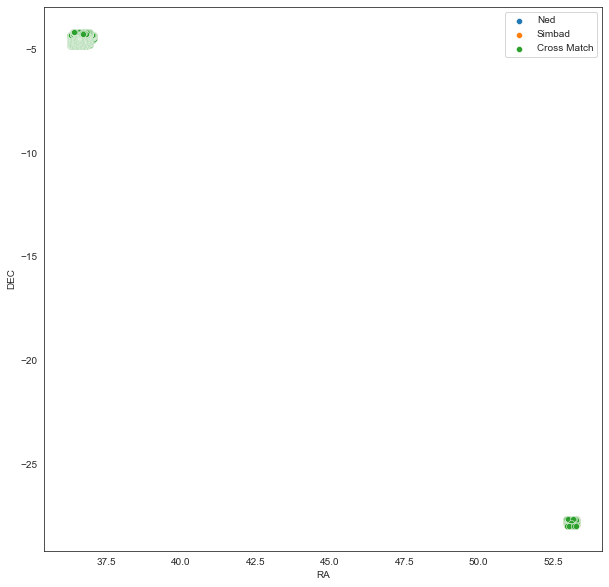

In [12]:
# Criando o ambiente do gráfico 
sns.set_style("white")
plt.figure(figsize=(10, 10))

# Gráfico de Dispersão
RA_DEC_Ned =ned_table["RA","DEC"]
Ned_pandas = RA_DEC_Ned.to_pandas()
RA_DEC_Simbad =simbad_table["RA","DEC"]
Simbad_pandas = RA_DEC_Simbad.to_pandas()
RA_DEC_Data = data["RA_1","DEC_1"]
Data_pandas = RA_DEC_Data.to_pandas()
g = sns.scatterplot(x = "RA", y = "DEC", data = Ned_pandas, label = 'Ned')
h = sns.scatterplot(x = "RA", y = "DEC", data = Simbad_pandas, label = 'Simbad')
w = sns.scatterplot(x = "RA_1", y = "DEC_1", data= Data_pandas, label = 'Cross Match')
plt.legend()
plt.show()

In [13]:
Ned_pandas

,RA,DEC
0,36.67950,-4.82100
1,36.67985,-4.82053
2,36.68013,-4.82081
3,36.43865,-4.82033
4,36.43875,-4.82031
...,...,...
3563,53.12358,-27.98343
3564,53.03403,-27.98347
3565,53.20987,-27.98083
3566,53.25917,-27.98733


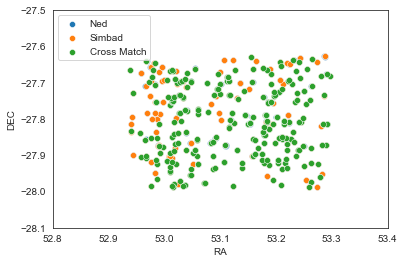

In [14]:
g = sns.scatterplot(x = "RA", y = "DEC", data = Ned_pandas, label = 'Ned')
h = sns.scatterplot(x = "RA", y = "DEC", data = Simbad_pandas, label = 'Simbad')
w = sns.scatterplot(x = "RA_1", y = "DEC_1", data= Data_pandas, label = 'Cross Match')
plt.legend()
plt.xlim(52.8,53.4)
plt.ylim(-28.1,-27.5)
plt.show()

In [15]:
data

No.,Object Name,RA_1,DEC_1,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations,MAIN_ID,RA_2,DEC_2,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,random
int32,bytes30,float64,float64,bytes6,float64,float64,bytes4,bytes5,float64,int32,int32,int32,int32,int32,int32,int32,bytes33,float64,float64,int16,int16,float32,float32,int16,str1,str1,bytes19,float64
1,VVDS 020086348,36.6795,-4.821,G,119018.0,0.397,,23.6V,0.002,4,0,3,2,1,0,0,VIDEO J022643.09-044915.70,36.6795,-4.821027777777777,6,6,--,--,0,C,O,2018A&A...611A..53J,0.2741704504223075
2,VVDS 020086397,36.43875,-4.82031,G,351057.0,1.171,,25.0V,0.003,4,0,1,2,1,0,0,VIDEO J022545.29-044913.14,36.43875,-4.820333333333333,6,6,--,--,0,C,O,2018A&A...611A..53J,0.6000794097468577
1,VVDS 020086471,36.50192,-4.82069,G,403521.0,1.346,,23.9V,0.002,3,0,0,1,1,0,0,VIDEO J022600.45-044914.59,36.50192916666666,-4.820716666666667,7,7,--,--,0,C,,2005A&A...439..845L,0.6725931978927109
1,SSTSL2 J022553.56-044914.6,36.47329,-4.82078,G,266516.0,0.889,,22.9V,0.002,5,0,14,3,1,0,0,VIDEO J022553.57-044914.80,36.47325,-4.820808333333333,7,7,--,--,0,C,O,2014A&A...562A..23G,0.9960853103944206
1,VVDS 020086792,36.31575,-4.8195,G,251526.0,0.839,,24.9V,0.002,4,0,2,2,1,0,0,VIDEO J022515.79-044910.01,36.31575,-4.819527777777777,6,6,--,--,0,C,O,2018A&A...611A..53J,0.8839424693800106
1,WISEA J022629.64-044914.8,36.62338,-4.82067,G,357353.0,1.192,,20.9I,0.002,15,0,38,9,7,0,0,3XMM J022629.6-044915,36.62340416666667,-4.8207249999999995,7,7,52.0,60.0,90,C,O,2016yCat.5147....0A,0.17066953943487595
1,VVDS 020087083,36.58125,-4.81894,G,240733.0,0.803,TENT,24.1V,0.003,4,0,3,2,1,0,0,VIDEO J022619.49-044908.38,36.581291666666665,-4.8189722222222215,6,6,--,--,0,C,O,2018A&A...611A..53J,0.8023394831229791
1,SSTSL2 J022654.02-044909.7,36.72512,-4.81931,*,173163.0,0.577611,PHOT,22.9V,0.002,4,0,10,3,1,0,0,VIDEO J022654.03-044909.66,36.72515833333333,-4.819308333333333,7,7,--,--,0,C,,2005A&A...439..845L,0.7072544159682044
1,VVDS 020087292,36.314,-4.81911,G,218249.0,0.728,,23.5V,0.002,5,0,7,2,1,0,0,VIDEO J022515.37-044908.73,36.314,-4.819138888888888,6,6,--,--,0,C,O,2018A&A...611A..53J,0.9076992907230922


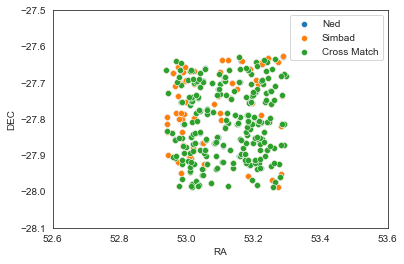

In [16]:
g = sns.scatterplot(x = "RA", y = "DEC", data = Ned_pandas, label = 'Ned')
h = sns.scatterplot(x = "RA", y = "DEC", data = Simbad_pandas, label = 'Simbad')
w = sns.scatterplot(x = "RA_1", y = "DEC_1", data= Data_pandas, label = 'Cross Match')
plt.legend()
plt.xlim(52.6,53.6)
plt.ylim(-28.1,-27.5)
plt.show()

In [17]:
error = 0.00001
data = astro.match(ned_table, simbad_table,'RA','RA','DEC','DEC',error)
if len(data) != 0:
    data.add_column(1.5, name = 'random')
    for i in range(0, len(data)):
        data[i]['random'] = np.random.random()

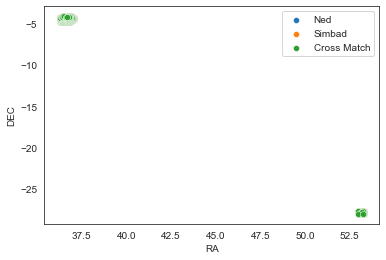

In [18]:
RA_DEC_Data = data["RA_1","DEC_1"]
Data_pandas = RA_DEC_Data.to_pandas()
g = sns.scatterplot(x = "RA", y = "DEC", data = Ned_pandas, label = 'Ned')
h = sns.scatterplot(x = "RA", y = "DEC", data = Simbad_pandas, label = 'Simbad')
w = sns.scatterplot(x = "RA_1", y = "DEC_1", data= Data_pandas, label = 'Cross Match')
plt.legend()
plt.show()

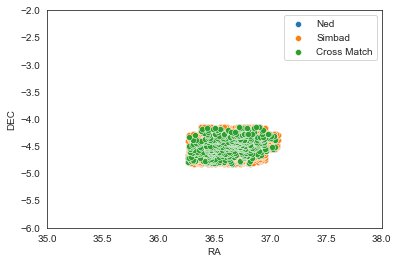

In [19]:
g = sns.scatterplot(x = "RA", y = "DEC", data = Ned_pandas, label = 'Ned')
h = sns.scatterplot(x = "RA", y = "DEC", data = Simbad_pandas, label = 'Simbad')
w = sns.scatterplot(x = "RA_1", y = "DEC_1", data= Data_pandas, label = 'Cross Match')
plt.legend()
plt.xlim(35,38)
plt.ylim(-6,-2)
plt.show()